In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv')

In [3]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [4]:
df.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [5]:
df.shape

(31984, 21)

In [6]:
df.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

Text(0.5,1,'2014 Boston Marathon Times')

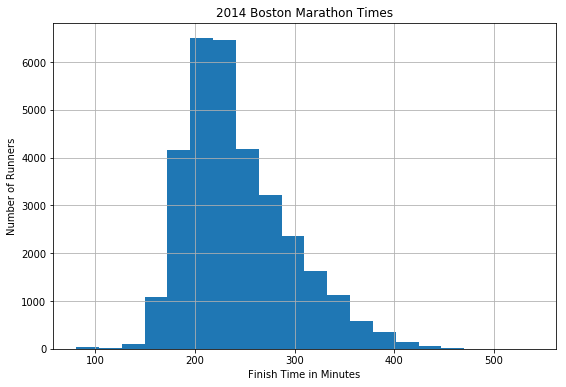

In [7]:
df.hist(column='official', figsize=(9,6),bins=20)
plt.xlabel('Finish Time in Minutes')
plt.ylabel('Number of Runners')
plt.title('2014 Boston Marathon Times')

In [8]:
df_new = df[['age','official','gender','genderdiv','division']]

df_new.loc[df_new['gender']=='M','gender'] = True
df_new.loc[df_new['gender']=='F','gender'] = False

df_new = df_new.dropna(axis=0)
df_new

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,age,official,gender,genderdiv,division
0,47,85.25,True,8,8
1,33,138.95,False,1,1
2,41,80.60,True,1,1
3,24,140.58,False,3,3
4,40,81.23,True,2,2
5,29,140.68,False,4,4
6,28,84.65,True,4,4
7,29,129.83,True,5,5
8,43,81.23,True,3,3
9,31,137.83,True,20,20


/usr/local/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


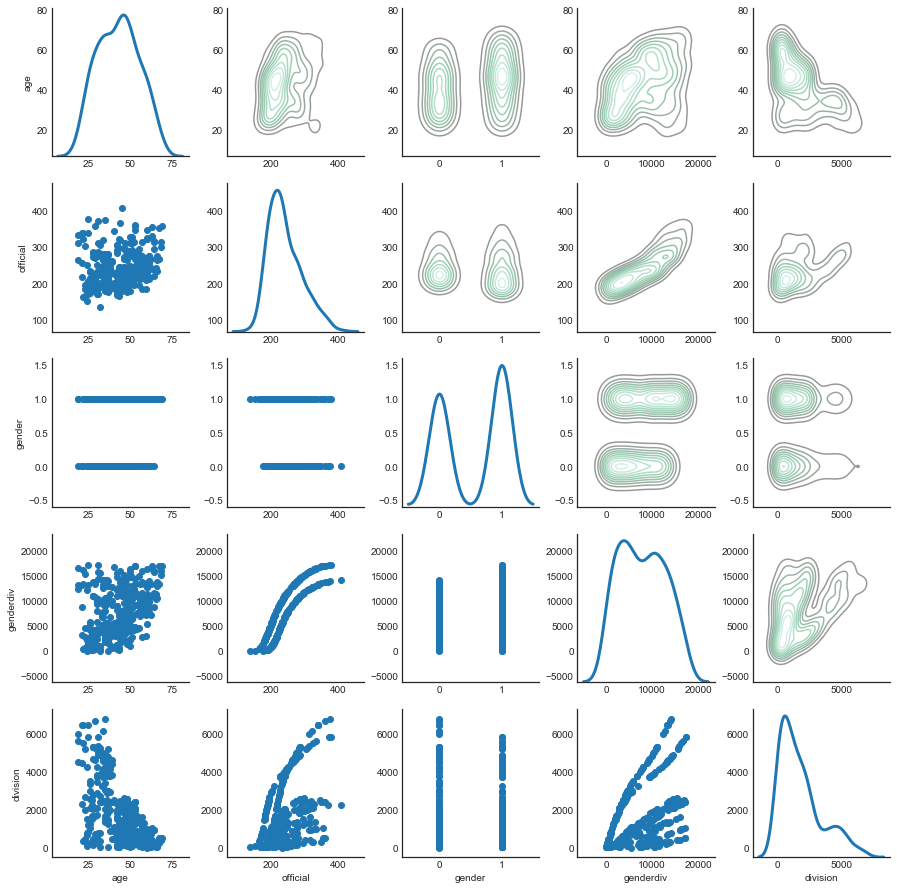

In [10]:
sns.set_style("white")
# Make a scatterplot matrix.
m = sns.PairGrid(df_new.sample(frac=0.01),diag_sharey=False)

# 2D KDEplot in upper right
m.map_upper(sns.kdeplot, alpha=.5)

# Fit line in lower left summarizing the linear relationship of the two variables.
m.map_lower(plt.scatter)

# On the diagonal, give Kernel Density Estimation of each variable.
m.map_diag(sns.kdeplot, lw=3)

# Adjust font size
plt.rcParams.update({'font.size': 12})

In [11]:
df_norm = normalize(df_new)

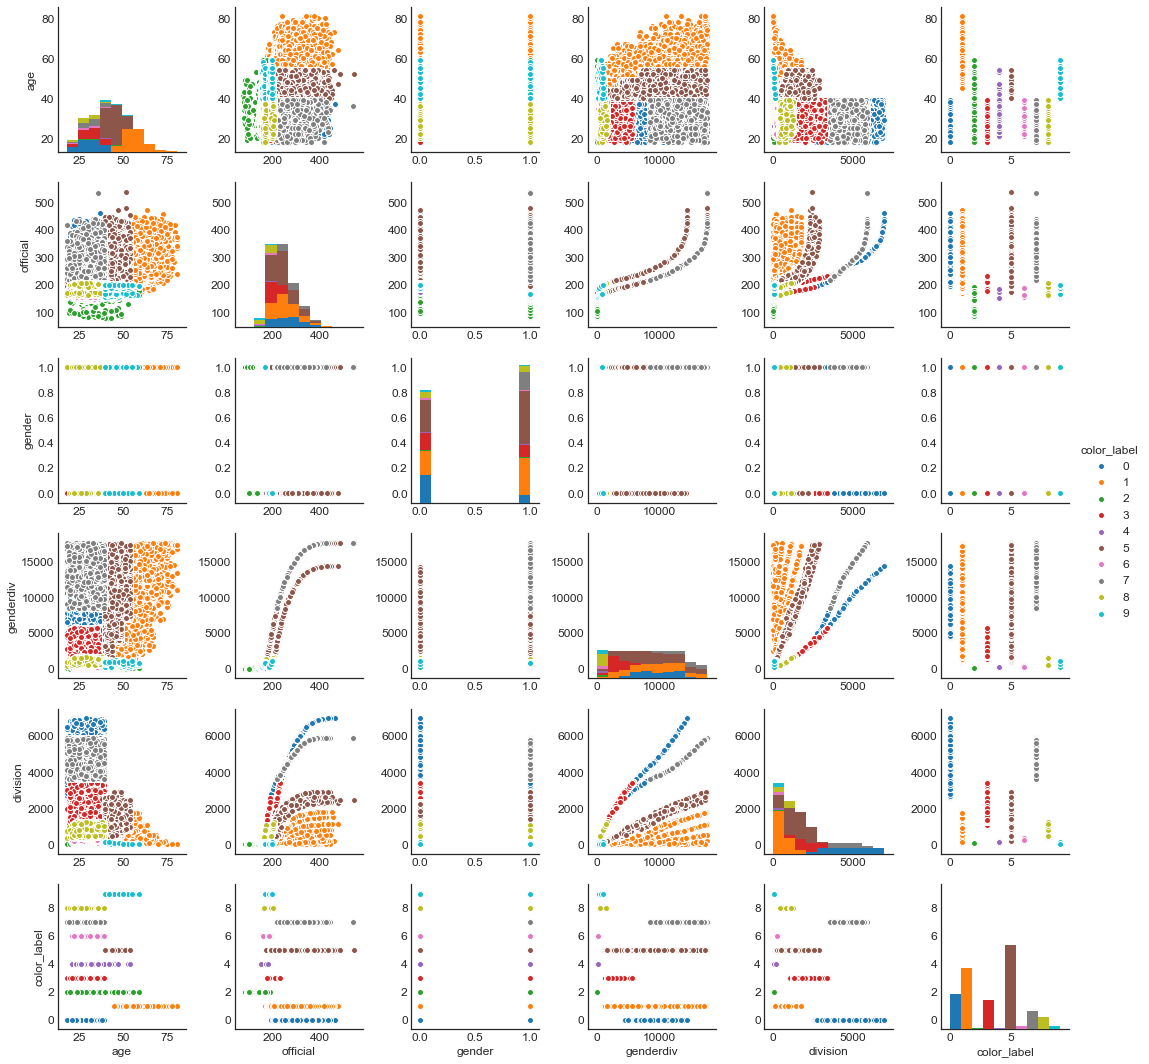

In [14]:
km = KMeans(n_clusters=10)
cluster_labels=km.fit_predict(df_norm)

df_color = df_new.copy()
df_color['color_label'] = cluster_labels 

sns.pairplot(df_color,hue='color_label')

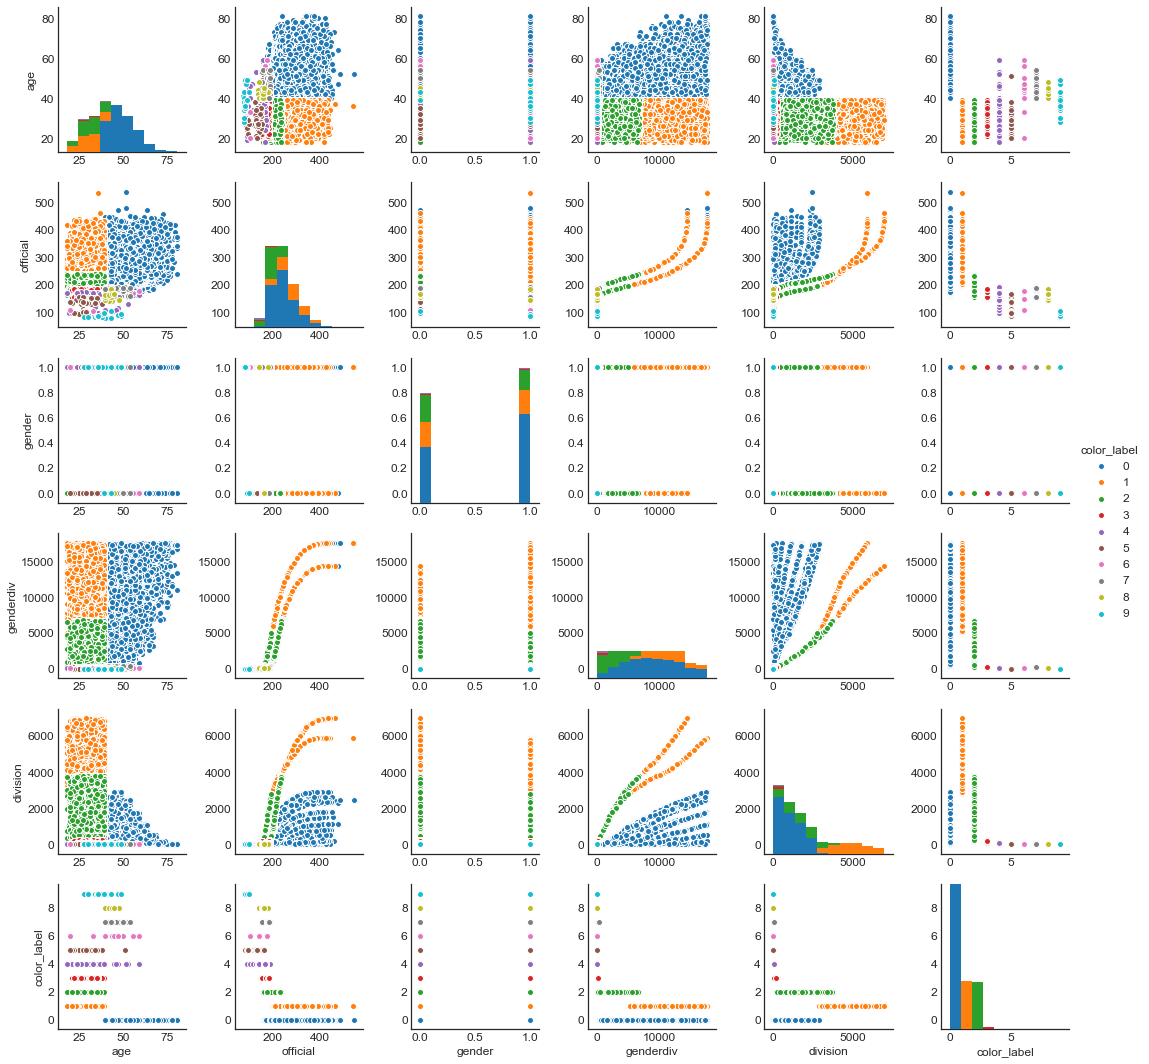

In [13]:
# Mean Shift

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(df_norm, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit_predict(df_norm)

# Extract cluster assignments for each data point.
labels = ms.labels_

df_color = df_new.copy()
df_color['color_label'] = ms.labels_ 

sns.pairplot(df_color,hue='color_label')

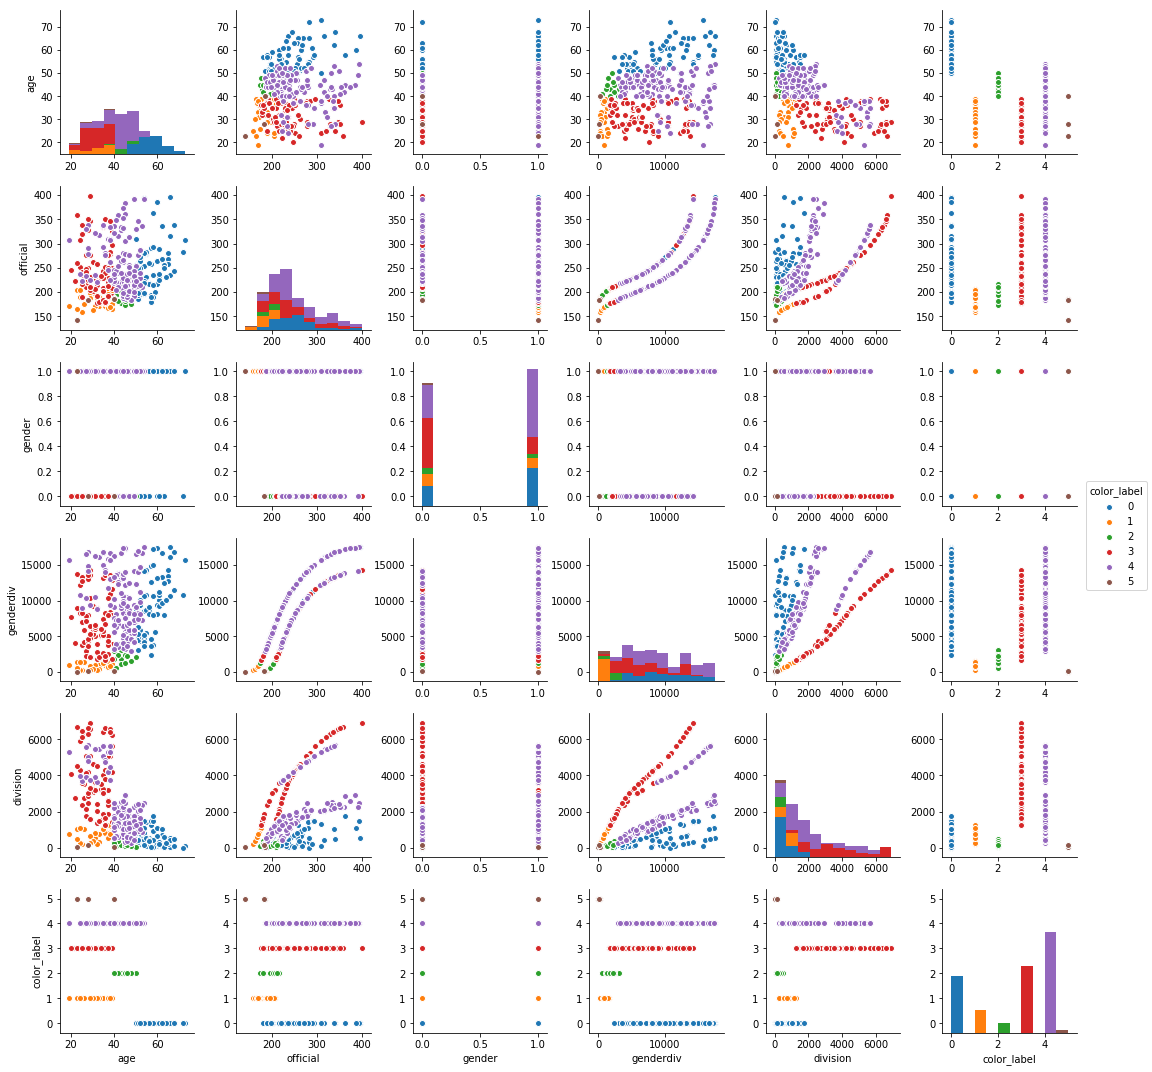

In [9]:
# Spectral Clustering

sample = df_new.sample(frac=0.01)
df_norm = normalize(sample)

sc = SpectralClustering(n_clusters=6)
cluster_colors=sc.fit_predict(df_norm)

df_color = sample.copy()
df_color['color_label'] = cluster_colors 

sns.pairplot(df_color, hue='color_label')

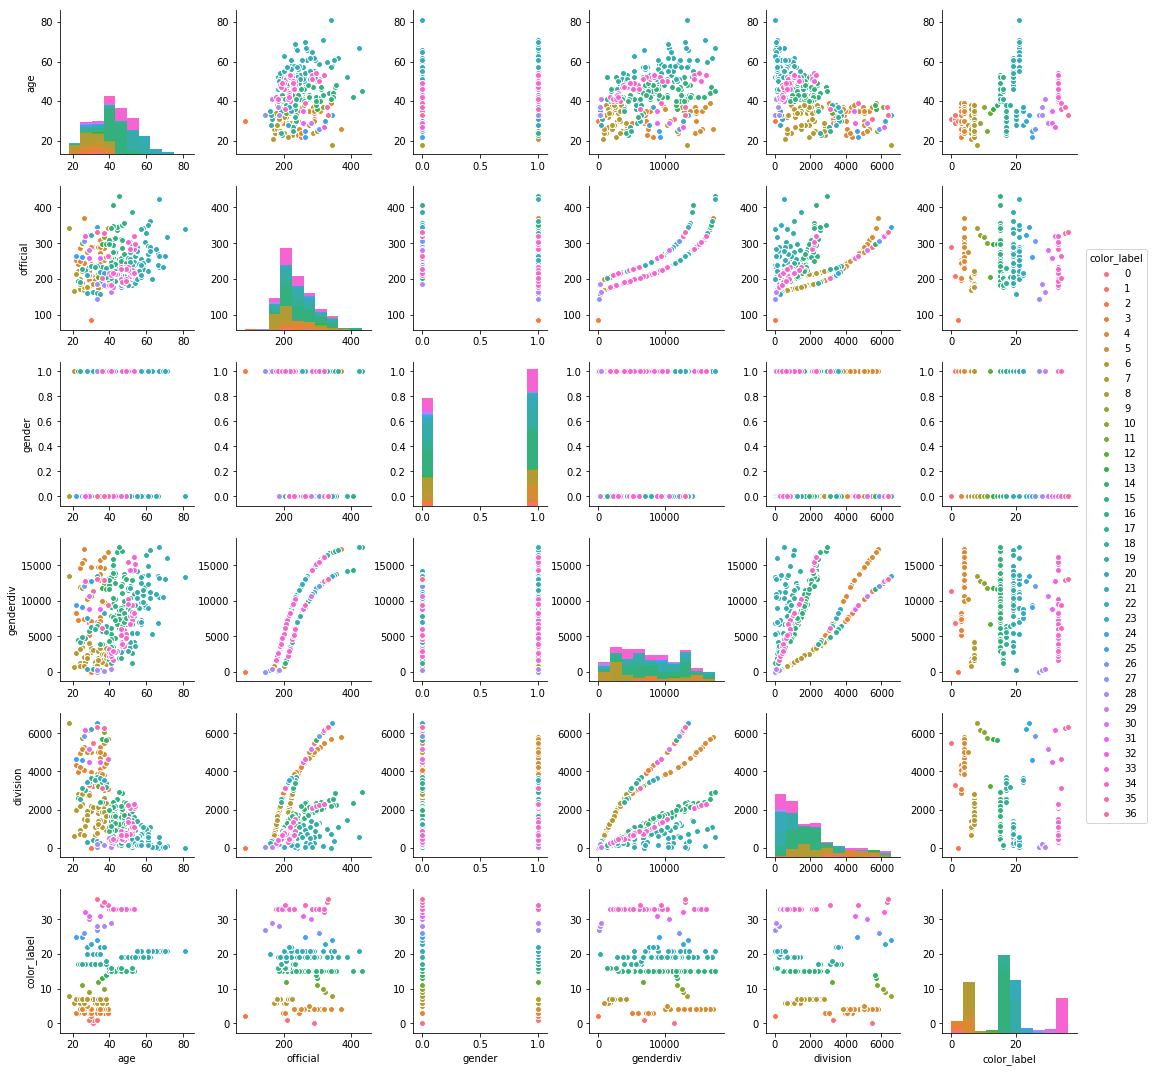

In [10]:
# Affinity Propagation

sample = df_new.sample(frac=0.01)
df_norm = normalize(sample)

ap = AffinityPropagation()
cluster_colors=ap.fit_predict(df_norm)

df_color = sample.copy()
df_color['color_label'] = cluster_colors 

sns.pairplot(df_color, hue='color_label')